# <center> ISEL - CPS </center> 
### Semestre 2021/22
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>


Trabalho realizado por:
- António Ferreia, número <b> 47500 </b>
- Tomás Gomes, número <b> 48614 </b>


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

O 1º trabalho foca os blocos de amostragem, reconstrução do sinal e Quantificação e Desquantificação do sinal.




Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Amostragem

1. Considere o sinal $x(t) = 20000 cos(2\pi 5025 t) + 10000 sin(2\pi 2507 t)$. Estude o sinal teoricamente. Apresente a expressão do espetro do sinal e represente numa figura o espectro de Amplitude e de Fase do sinal.


$x(t) = 20000 cos(2\pi 5025 t) + 10000 cos(- 2\pi 2507 t + 2\pi)$

![fig_trab](ex1.jpg)

2. Gere o sinal $x(t)$ usando o Python. Cnsidere o intervalo de tempo $0 < t < 1\,ms$, e a frequência de amostragem de 48KHz. Apresente numa figura o sinal no domínio do tempo e noutra figura o seu espetro de amplitude.


- Domínio do Tempo(s)

In [2]:
Fs = 48000
Ts = 1/Fs
t = np.arange(0,0.001,Ts)
x  = 20000 * np.cos(2*np.pi * 5025* t) + 10000 * np.cos( - 2*np.pi * 2507* t + np.pi/2)
# x = 20000 * np.cos(2*np.pi * 5025* t) + 10000 * np.sin(2*np.pi * 2507* t)
# é a mesma coisa com sin e cos 

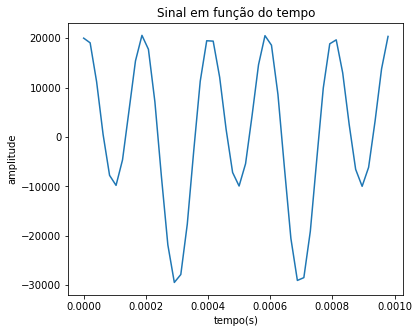

In [3]:
plt.subplots(1,1, figsize = (6,5))
plt.title('Sinal em função do tempo')
plt.xlabel('tempo(s)')
plt.ylabel('amplitude')
plt.plot(t,x)

- Domínio da Frequência(HZ)

In [4]:
Xf   = np.fft.fft(x) / len(x) 
fk   = np.fft.fftfreq(len(Xf)) * Fs
fase = np.angle(Xf)
amp  = np.abs(Xf)

<Figure size 432x288 with 0 Axes>

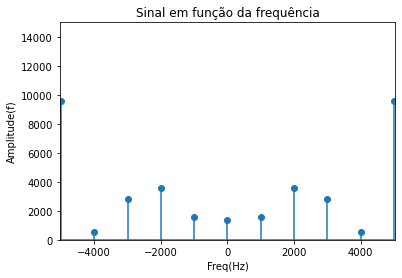

<Figure size 432x288 with 0 Axes>

In [5]:
plt.title('Sinal em função da frequência')
plt.xlabel("Freq(Hz)")
plt.ylabel("Amplitude(f)")
plt.stem(fk,amp, use_line_collection = True)
plt.axis([-5025, 5025, 0, 15000])
plt.figure()

3. Admitindo que faz a amostragem do sinal com uma frequência $f_s = 8kHz$, represente o espectro do sinal amostrado. Comente os resultados apresentados.

In [6]:
Fs1  = 8000
Ts1  = 1/Fs1
t1   = np.arange(0,0.001,Ts1)
x   = 20000 * np.cos(2 * np.pi * 5025 * t1) + 10000 * np.sin(2 * np.pi * 2507 * t1)

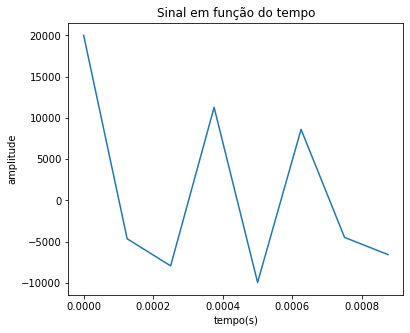

In [7]:
plt.subplots(1,1, figsize = (6,5))
plt.title('Sinal em função do tempo')
plt.xlabel('tempo(s)')
plt.ylabel('amplitude')
plt.plot(t1,x)


Comentário: 
- Com a frequência de amostragem de 8000 Hz é menor à pedida anteriormente (48KHz) o plot usa menos pontos. 
- Como a função usa menos pontos para desenhar o gráfico, o gráfico aparenta estar "desfigurado" comparado com o primeiro.

# Quantificação

4. Construa uma função em Python que crie as tabelas com os intervalos de decisão e valores de quantificação para um quantificador uniforme. 

    Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída tem dois Numpy arrays com valores de quantificação e os intervalos de decisão.

- No 'midtread', o Vq tem o valor zero
- No 'midrise', o Iq Tem o valor zero 

In [8]:
def Quantific(R,Vmax,Qtype):
    L = 2.**R 
    delta = (2.*Vmax)/L
    delta_2 = delta/2
    v_max_posi = (L-1)*delta_2
    
    Vq = np.arange(-v_max_posi, v_max_posi+delta, delta)
    Iq = np.arange(-Vmax, Vmax+delta, delta)

    if(Qtype == 'midtread'): # midtread
        Iq[1:-1] = Iq[1:-1]+delta_2
        Vq = Vq + delta_2

    return Vq, Iq

   Verifique se a sua implementação está correta.
   Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.

In [9]:
Vq,Iq = Quantific(3,1,'midtread')
print(Vq)
print(Iq)

[-0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
[-1.    -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875  1.   ]


Implemente uma função que realize a quantificação:

In [10]:
# Função que implementa o Quantificador
# in: 
# x - sinal com amostras (nao quantificadas)
# Vq, Iq - valores de quantificação e intervalos de decisão
# out: 
# xq - sinal quantificado
# iq - indices do sinal quantificado
# prototipo da função
# xq, iq = Quantificador(x, Vq, Iq)
def Quantificador(Rx, Vq, Iq):
    iq = np.digitize(Rx,Iq)
    iq = np.array([len(Vq)-1 if Rx >= len(Vq) else Rx for Rx in iq])
    xq = Vq[iq-1]   
    return xq,iq

In [11]:
## Testes ##
Vq    = np.array([-0.75, -0.25, 0.25, 0.75])
Iq    = np.array([-0.5, 0, 0.5,1])
x     = [0.1, 0.6, -0.8]
xq,iq = Quantificador(x, Vq, Iq)
print(Vq)
print(Iq)
print(xq)
print(iq)

[-0.75 -0.25  0.25  0.75]
[-0.5  0.   0.5  1. ]
[-0.25  0.25  0.75]
[2 3 0]


Construa um sinal de rampa $x(t)= 1000t\Pi\left(\frac{t-0.5\times10^{-3}}{10^{-3}}\right)$, no intervalo $0<t<1\,ms$.
Represente o sinal x(t), o sinal quantificado e o sinal de erro.

In [12]:
Ts3 = 0.001
t3 = np.arange(-Ts3,Ts3,1/1000000)
sinal = t3*1000*np.pi*((t3-0.5*10**-3)/10**-3)

In [13]:
valores_quantificacao = Quantific(4,5.5,'midtread')[0]
valores_decisao       = Quantific(4,5.5,'midtread')[1]

In [14]:
sinal_quantificado            = Quantificador(sinal,valores_quantificacao,valores_decisao)[0]
indices_do_sinal_quantificado = Quantificador(sinal,valores_quantificacao,valores_decisao)[1]

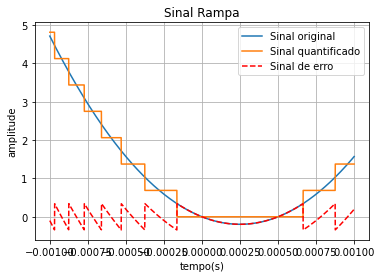

In [15]:
eq = sinal-sinal_quantificado
plt.title('Sinal Rampa')
plt.xlabel('tempo(s)')
plt.ylabel('amplitude')
plt.rcParams["figure.dpi"] = 100
plt.plot(t3,sinal, label="Sinal original")
plt.plot(t3,sinal_quantificado, label="Sinal quantificado")
plt.plot(t3,eq, 'r--', label="Sinal de erro")
plt.grid("on")
plt.legend()

Represente o histograma do sinal de erro. Comente os resultados.

(array([ 95.,  93.,  90., 304., 196., 161., 146., 135., 127., 124., 117.,
        114., 101., 101.,  97.]),
 array([-0.34278875, -0.29704716, -0.25130557, -0.20556398, -0.15982239,
        -0.1140808 , -0.06833921, -0.02259762,  0.02314397,  0.06888556,
         0.11462714,  0.16036873,  0.20611032,  0.25185191,  0.2975935 ,
         0.34333509]),
 <BarContainer object of 15 artists>)

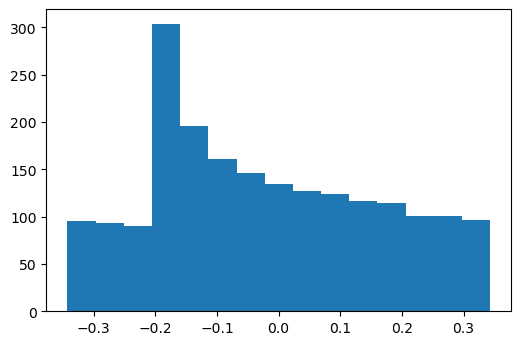

In [16]:
plt.hist(eq, bins='auto')

- Para calcular o erro foram utilizados os valores absolutos da diferença entre o sinal quantificado e o sinal rampa original.
- Como se pode observar no gráfico, onde o gráfico de barras é mais baixo, existe menos erro.

5. Implemente uma função que realize a desquantificação:

In [17]:
def desQuant(xq, eq):
    xd = xq + eq
    return xd

eq = sinal - sinal_quantificado
sinal_des = desQuant(sinal_quantificado, eq) 
print(sinal_des==sinal)

[ True  True  True ...  True  True  True]


Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.


In [18]:
def Measure_SNRp(signal, signalQ):
    error = signal - signalQ
    SNRp = 10 * np.log10(sum(signal**2) / sum(error**2))
    return SNRp

Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [19]:
def Measure_SNRt(signal, VqMax, R):
    P = sum(signal**2.)/len(signal) 
    SNRt = 6.02 * R + 10 * (np.log10((3 * P) / (VqMax)))
    return SNRt

Considere o sinal de rampa já implementado.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

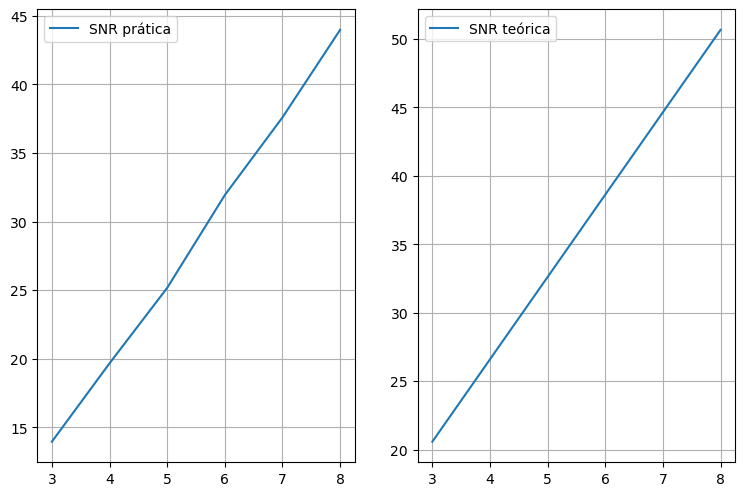

In [20]:
r = np.array([3,4,5,6,7,8])
snr_teorico = np.array([Measure_SNRt(sinal,np.amax(sinal),indice) for indice in r])
snr_pratico = []
for indice in r:
    Vq, Iq = Quantific(indice,np.amax(sinal),'midtread')
    sinal_quantificado = Quantificador(sinal,Vq,Iq)[0]
    snr_pratico.append(Measure_SNRp(sinal,sinal_quantificado))    

plt.subplots(1,2, figsize = (9,6))
plt.subplot(1,2,1)
plt.plot(r,snr_pratico, label="SNR prática")
plt.grid("on")
plt.legend()
plt.subplot(1,2,2)
plt.plot(r,snr_teorico, label="SNR teórica")
plt.grid("on")
plt.legend()

- Considerando o sinal rampa, podemos observar que os SNRs teórico e prático são bastante semelhantes.
- A diferença entre ambos está no facto de que no SNR prático ser considerado o sinal quantificado ao contrário do SNR teórico.


Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a leitura do ficheiro de aúdio previamente gravado para um Numpy array. Apresente o sinal em função do tempo.

In [21]:
#Resposta
import scipy.io.wavfile as wav
import IPython.display as ipd

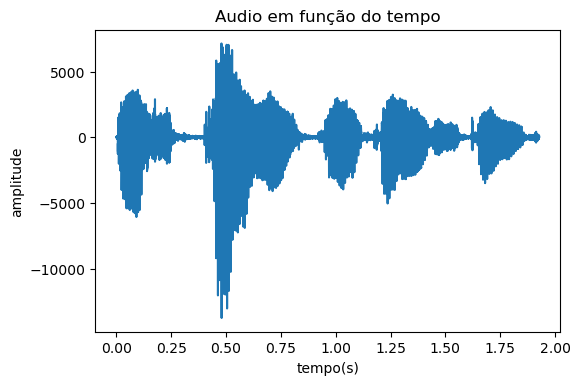

In [22]:
ficheiro = 'audio.wav'
Fs_audio, sinal_audio = wav.read(ficheiro)
tempo_audio = np.linspace(0, len(sinal_audio) / Fs_audio, num=len(sinal_audio))
plt.title('Audio em função do tempo')
plt.xlabel('tempo(s)')
plt.ylabel('amplitude')
plt.plot(tempo_audio,sinal_audio)


Realize a quantificação do sinal de voz para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados.

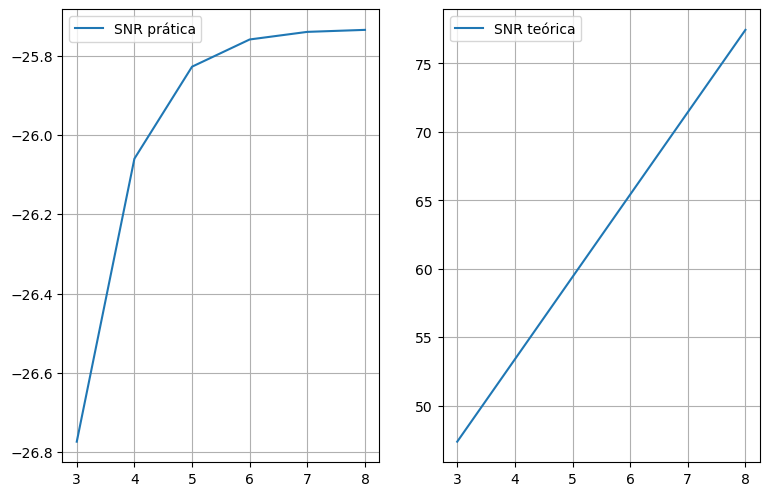

In [23]:
r = np.array([3,4,5,6,7,8])
snr_teorico_audio = np.array([Measure_SNRt(sinal_audio,np.amax(sinal_audio),indice) for indice in r])
snr_pratico_audio = []

bk = np.ones(10)/10
vmax_sinal_audio = np.amax(np.convolve(sinal_audio,bk))

for indice in r:
    Vq, Iq = Quantific(indice,vmax_sinal_audio,'midtread')
    sinal_quantificado_audio = Quantificador(sinal_audio,Vq,Iq)[0]
    snr_pratico_audio.append(Measure_SNRp(sinal_audio,sinal_quantificado_audio))    

plt.subplots(1,2, figsize = (9,6))
plt.subplot(1,2,1)
plt.plot(r,snr_pratico_audio, label="SNR prática")
plt.grid("on")
plt.legend()
plt.subplot(1,2,2)
plt.plot(r,snr_teorico_audio, label="SNR teórica")
plt.grid("on")
plt.legend()

ipd.Audio('audio.wav')

- Não usando a Quantificação Não Uniforme, podemos observar que o SNR prático, apresenta valores afastados do SNR teórico.

Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

In [47]:
from PIL import Image
Qs = np.array([2,5,10,25,150])
im = Image.open("lena_gray.bmp")
i = 0
flag =True
while(flag):
    im.quantize(Qs[i]).show()
    i = i + 1
    if i == 5:
        flag = False

- Amostrando a imagem lena_gray.tif, concluimos que quantos mais néveis de quantificação existirem, maior será a resolução da imagem.